# 0 - Aula 3 - Exercicio individual

# 1 Importando as bibliotecas

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 2 Importando as bases

In [37]:
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/RiscoCredito%20-%20okk.csv')
treino.head(5)


,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.4
1,0,2,7,9,2.6
2,0,1,7,9,5.8
3,0,1,7,9,4.7
4,0,1,7,9,3.9


In [38]:
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/data/main/RiscoCredito%20-%20prever2.csv')
teste.head(5)

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.4
1,0,2,7,9,2.6
2,0,1,7,9,5.8
3,0,1,7,9,4.7
4,0,1,7,9,3.9


# 4 Treinando modelo KNN

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(treino[['Genero', 'GrauEscolaridade', 'Profissao', 'Renda']], treino['Inadimplente'])


KNeighborsClassifier(n_neighbors=3)

## 4.1 Testando acurácia do modelo

In [40]:
acc_treino = knn.score(treino[['Genero', 'GrauEscolaridade', 'Profissao', 'Renda']], treino['Inadimplente'])
print('Acuracia de treino: %.4f' % acc_treino)

Acuracia de treino: 1.0000


## 4.2 Testando o modelo com as variaveis teste

In [41]:
pred_test = knn.predict(teste[['Genero', 'GrauEscolaridade', 'Profissao', 'Renda']])
pred_test

array([1, 0, 0, 0, 0, 0, 0, 1])

## 4.3 Acurácia em testes

In [42]:
acc_test = accuracy_score(teste['Inadimplente'], pred_test)
print('Acuracia de teste: %.4f' % acc_test)

Acuracia de teste: 1.0000


# 5 Matriz de confusão

[[6 0]
 [0 2]]


<Axes: >

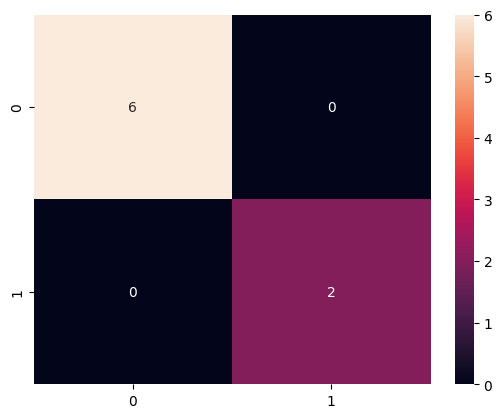

In [43]:
conf_matrix = confusion_matrix(teste['Inadimplente'], pred_test)
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='g')

## 5.2 Relatório de Classificação

In [44]:
print(classification_report(teste['Inadimplente'], pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

